# Modelling population turnover

In our previous SIR model, we have assumed a closed population, i.e. one where no one dies and no babies are born. In terms of the epidemic dynamics, that has meant that as more and more people become infected and recovered, the pool of susceptibles continually decreases, and thus so too does the effective reproduction number. This is fine for diseases with short infectious periods, that spread through a population more quickly than the population is able to renew itself. But what about longer timescales? In this etivity, we want to incorporate births and deaths into the basic SIR model. The structure for this model looks like this:

<img src="Graphics_and_Data/w4_nb1_model_diagram.png">

### Question: Write down the differential equations for this model on paper. What are the underlying assumptions regarding births and deaths?

\begin{align}
\frac{dS}{dt} & = -\beta \frac{I}{N} S + b N - \mu S \\
\frac{dI}{dt} & = \beta \frac{I}{N} S -\gamma I - \mu I \\
\frac{dR}{dt} & = \gamma I - \mu R
\end{align}

Then, copy-paste the SIR model code you have developed before, and extend it to capture this population turnover process. In the first instance, we are looking at an acute disease epidemic introduced into a fully susceptible human population. The infection and recovery rates are 0.4 and 0.2 days$^{-1}$ respectively. We can calculate the background mortality rate based on the average human lifespan - let's assume that this is 70 years, so *mu* = 1/70 years$^{-1}$, or 1/(70x365) days$^{-1}$. In this example, we are also assuming that the population size stays constant over time at 10$^{6}$ - to achieve that, we set the birth rate b = *mu*.

Code this model and run it first for 1 year, and **plot only the number of infected people over time** at this point. Confirm that you observe your regular SIR epidemic curve before proceeding. 

In [21]:
### YOUR CODE GOES HERE ###

# Modelling the epidemic

# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

initial_state_values <- c(S = 1e6 - 1,
                          I = 1,
                          R = 0)
parameters <- c(beta = 0.4*365, gamma = 0.2*365, mu = 1/70, b = 1/70)

# TIMESTEPS:

times <- seq(from = 0, to = 1, by = 1/365)

sir_model <- function(time, state, parameters) {  
    
    with(as.list(c(state, parameters)), {     
      
        N <- S+I+R
        lambda <- beta * I/N
        dS <- -lambda * S + b * N - mu * S
        dI <- lambda * S - gamma * I - mu * I
        dR <- gamma * I - mu * R
    
        return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

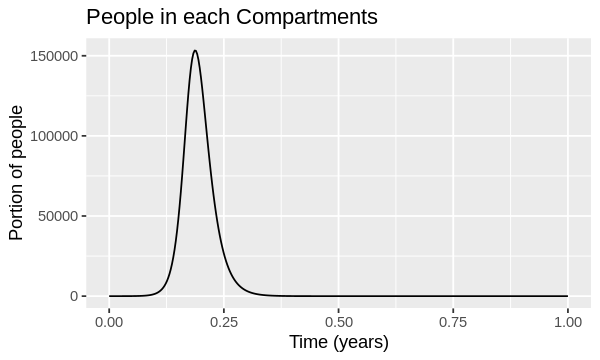

In [22]:
# Plotting the proportion of people in each compartment over time

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output,          # specify object containing data to plot
       aes(x = time, y = I)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (years)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Infected"), values = c("red"))

Now, change the duration of the model run to several generations, for example 400 years. 

**A note on timesteps:**  
So far, we have only modelled short-term disease dynamics, where it was intuitive to express the timesteps in units of days. In this example, the simulation timescale is much longer, so it might be easier to change the units to years (although the result is also correct if we model 400 years as 146000 days). Now, we need to start thinking about the **interval** of the timesteps, in the code below.

Before investigating the disease dynamics, play around with the timesteps at which you are solving the model in your code above and plot the output. In the cell below, it is daily - also try solving it only at every 2, 3, 4 and 5 days. Keep in mind that as we are running the model for longer now, it might take your computer longer to produce the output. 

### Question: How does changing the interval of the timesteps to solve the model at influence the output? Does the plot look correct in each case? If not, at what resolution of timesteps do you get erroneous results, and why?

Daily intervals of 1/365 to 4/365 work well and completly similar (except the compile time) but at 5/365 we get warnings and wrong output.

The reason behind it is that although we are using year time intervals, we are still using daily time intervals in our code and 5 day$^{-1}$ is bigger than infectious period (1/0.2 = 5 days). So it can not solve it.

In [36]:
times2 <- seq(from = 0, to = 400, by = 4/365)   # from 0 to 400 YEARS in DAILY intervals

output2 <- as.data.frame(ode(y = initial_state_values, 
                            times = times2, 
                            func = sir_model,
                            parms = parameters))

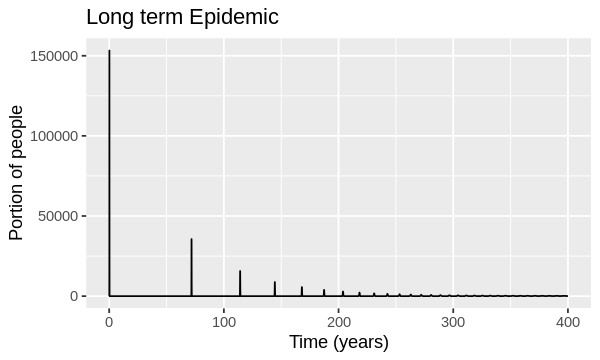

In [37]:
# Plotting the proportion of people in each compartment over time

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output2,          # specify object containing data to plot
       aes(x = time, y = I)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "Long term Epidemic", x = "Time (years)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Infected"), values = c("red"))

### Question: What do you observe about the long-term disease dynamics under these assumptions? Can you explain why this pattern occurs based on what you have learnt in the last weeks?

We can see that epidemics occur over time with a really short peaks which they get smaller and smaller until they almost disappear. 

The pattern occurs because the disease has a much shorter duration than the human population turnover. It takes a long time for population to replanish the susceptible pool and this the reason behind different peaks.

Now make a plot that also shows the number of susceptible and recovered individuals, as a proportion of the total population.

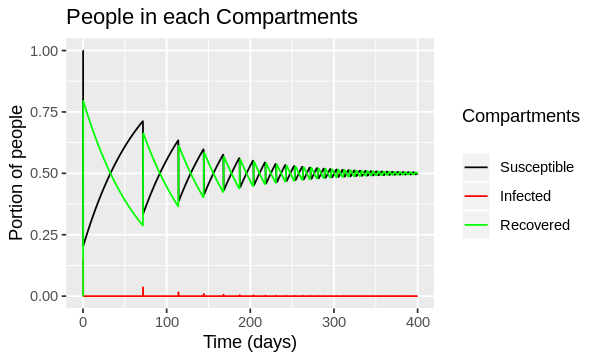

In [38]:
# Plotting the prevalence of S, I and R over time 

output_long <- melt(as.data.frame(output2), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

### Question: Does this confirm your hypothesis? Also think about how it relates to the effective reproduction number.

As you can see, there are consecutive peaks and troughs in the number of susceptible and immune people as well. Once the proportion of susceptibles is sufficiently high for infection to spread, the number of infected people starts rising. Just before the peak of the epidemic, more susceptibles are removed through infection than are added through births, so the susceptible proportion starts going into decline again.

In the second example, we are modelling a similar acute disease, but this time we are changing the mortality and birth rates to represent a population with a much more rapid turnover. The infection parameters are the same as before, but we are assuming the average lifespan is 4 weeks this time.

Code this scenario below and run the model for 1 year, and plot the prevalence of susceptibility, infection and recovery over time.

In [39]:
### YOUR CODE GOES HERE ###

parameters3 <- c(beta = 0.4, gamma = 0.2, mu = 1/(4*7), b = 1/(4*7))
times3 <- seq(from = 0, to = 365, by = 1)   # from 0 to 400 YEARS in DAILY intervals

output3 <- as.data.frame(ode(y = initial_state_values, 
                            times = times3, 
                            func = sir_model,
                            parms = parameters3))

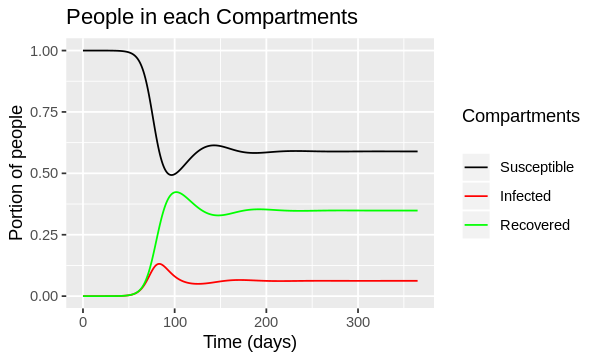

In [40]:
# Plotting the prevalence of S, I and R over time 

output_long <- melt(as.data.frame(output3), id = "time")                  

options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(data = output_long,          # specify object containing data to plot
       aes(x = time, y = value / 1e6, group = variable, colour = variable)) +   # assign columns to axes and groups
  geom_line() +                     # represent data as lines
  labs(title = "People in each Compartments", x = "Time (days)", y = "Portion of people", color = "Compartments\n") +
  scale_color_manual(labels = c("Susceptible", "Infected", "Recovered"), values = c("black", "red", "green"))

### Question: How do the disease dynamics compare to the previous example? Why does this occur (what is different compared to the disease in the human population)?

We increased population's life span. In the rapid-turnover population, we don't observe epidemic cycles like in the previous slow-turnover example. The epidemic occurs after about 80 days of introduction of an infectious case. After the peak, the prevalence of infection starts to decline - but this time not to 0

## Additional questions

The examples we have modelled here can be compared to real-world diseases. An acute disease that causes a pattern of epidemic cycles in human populations like in the first example is measles. The second example on the other hand is more comparable to endemic swine flu on pig farms, where pigs enter and leave the farm in a matter of weeks (hence the 'average lifespan' that you modelled, of 4 weeks).

However, the basic SIR model is very simple and does not account for many of the factors that can affect disease dynamics in reality. For example, measles notifications data from the pre-vaccination era suggest that epidemic oscillations did not flatten out over time like in our model. This tells us that there are other processes that sustain these cycles, that we have not included in the model. 

### Question: Can you think of other drivers for epidemic cycles?

- Environment: like wind or tempreture effects.
- Stochastics
- Physical attributes of animalls.

This etivity was also your first look at a simple demographic process with births and deaths. As you might have noticed, the population size in this example stayed constant over time. However, if we were to model the demography of a country over time, an increasing population size is usually more realistic. 

### Question: How would you change the birth and death rate to model a growing population? What other factors could drive population growth?

* For a growing population, birth rate should be greater than death rate. Migration and advertising might be another factors.

In this etivity, we also made the assumption that all babies are born susceptible. Of course, this is not always the case in reality: maternal antibodies can confer immunity to newborns, neonatal vaccination can make newborns immune to infection, and some infections can be transmitted from mothers to their children, like HIV. 

### Question: How would you adapt the differential equations to model a disease where a proportion *p* of babies born to infected mothers are infected at birth? Write them out on paper.

Instead of adding b to the $S$, we can add ($p$ * b) to $S$ and ($1-p$ * b) to $R$.

**As always, you can find the solutions file in the "Solutions" folder.**